# This script is for Plotting Viscometry Rheology Data data

## How do I grab the Rheology data?
Step 1 is to open rSpace, open the results data, click the + symbols until you get to the final results
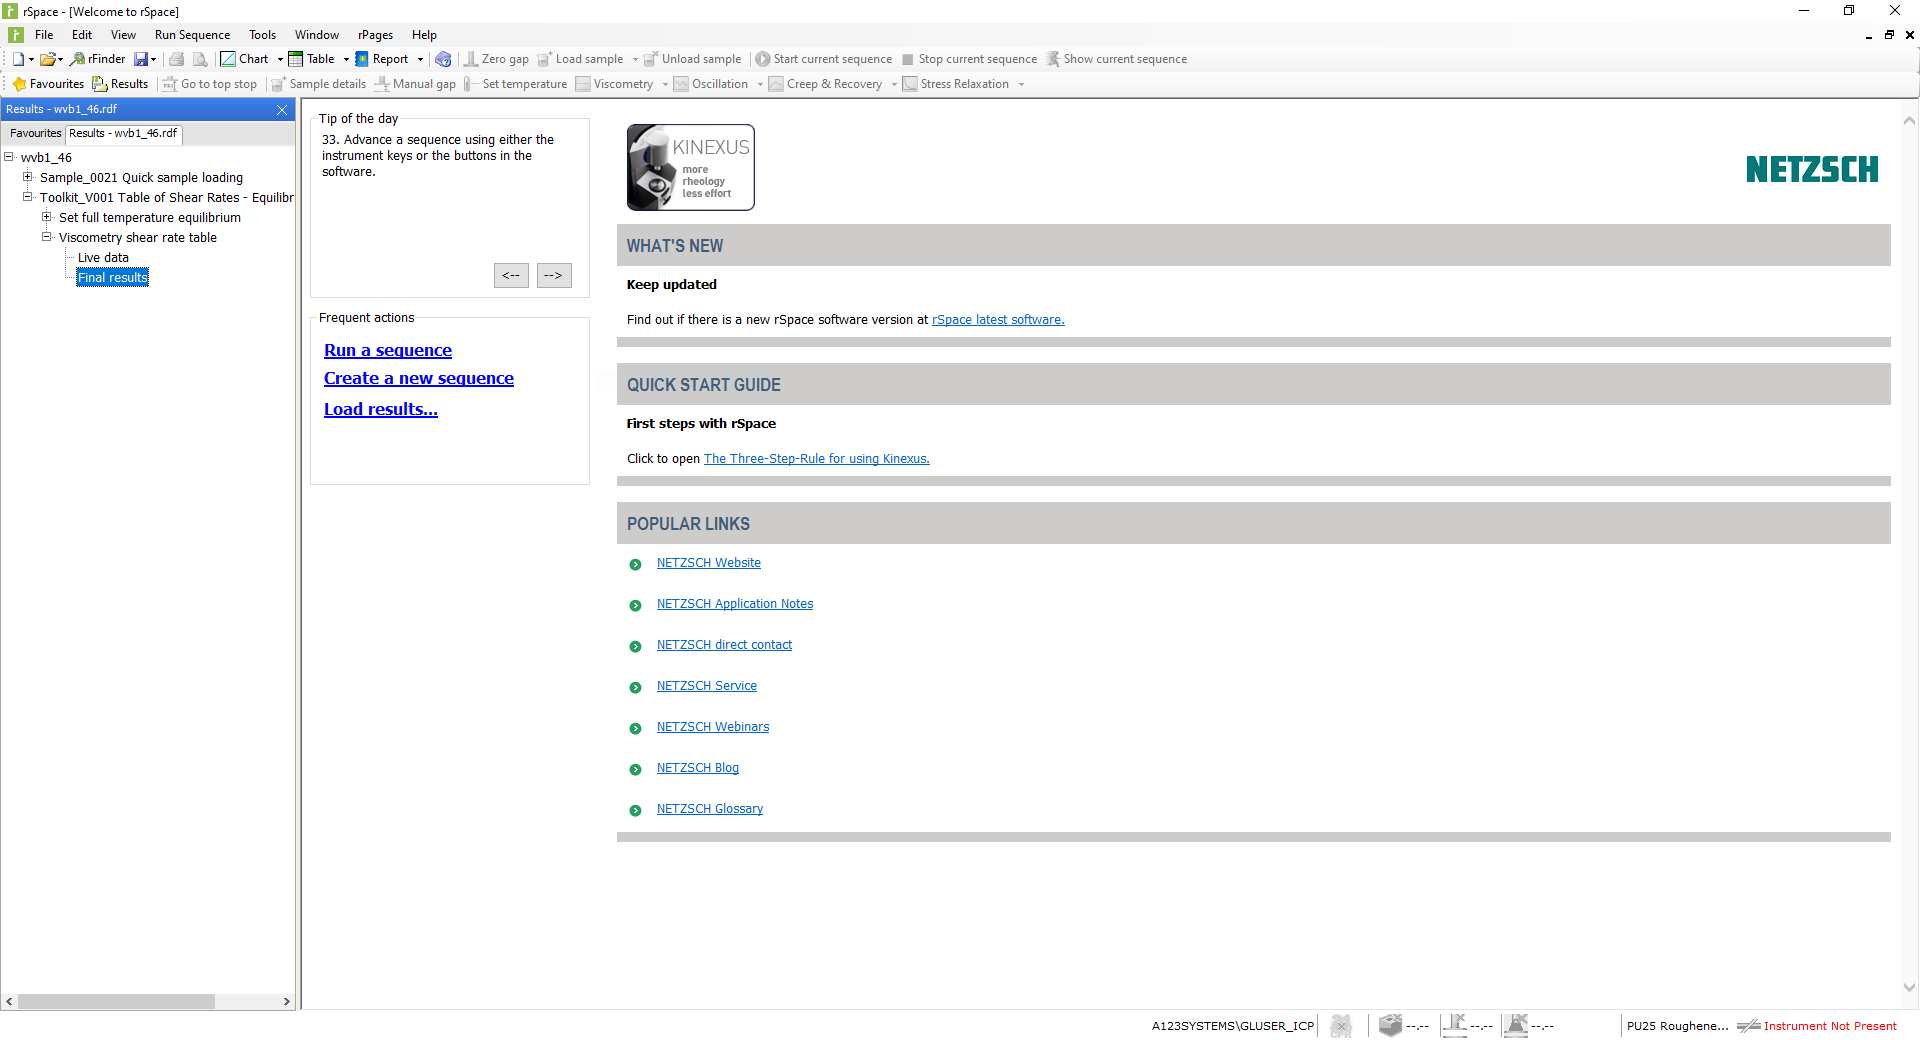

Step 2 is right click on the final results and select "send to table" where you can select the Viscometry -- Results data.tbl from either recent tables or through Open Template...
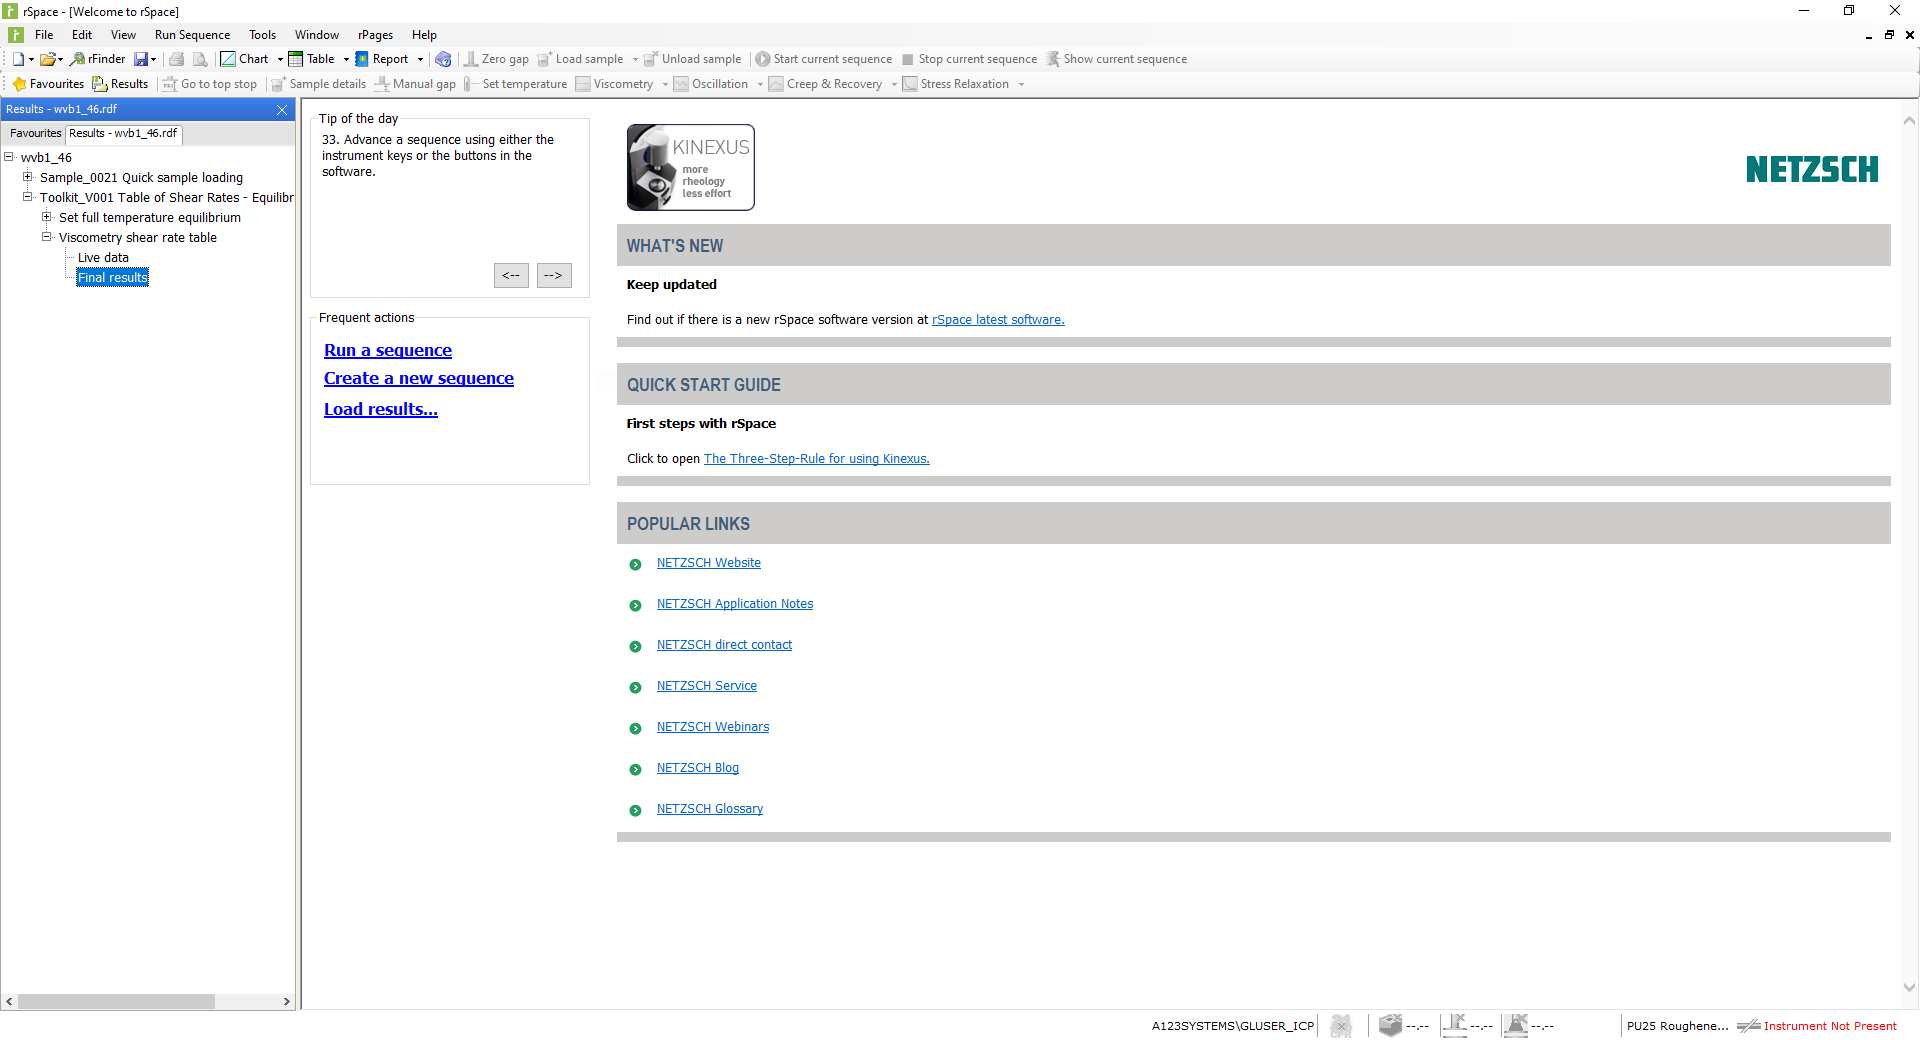

Step 3, click the top left cell circled in red here to highlight everything in the table
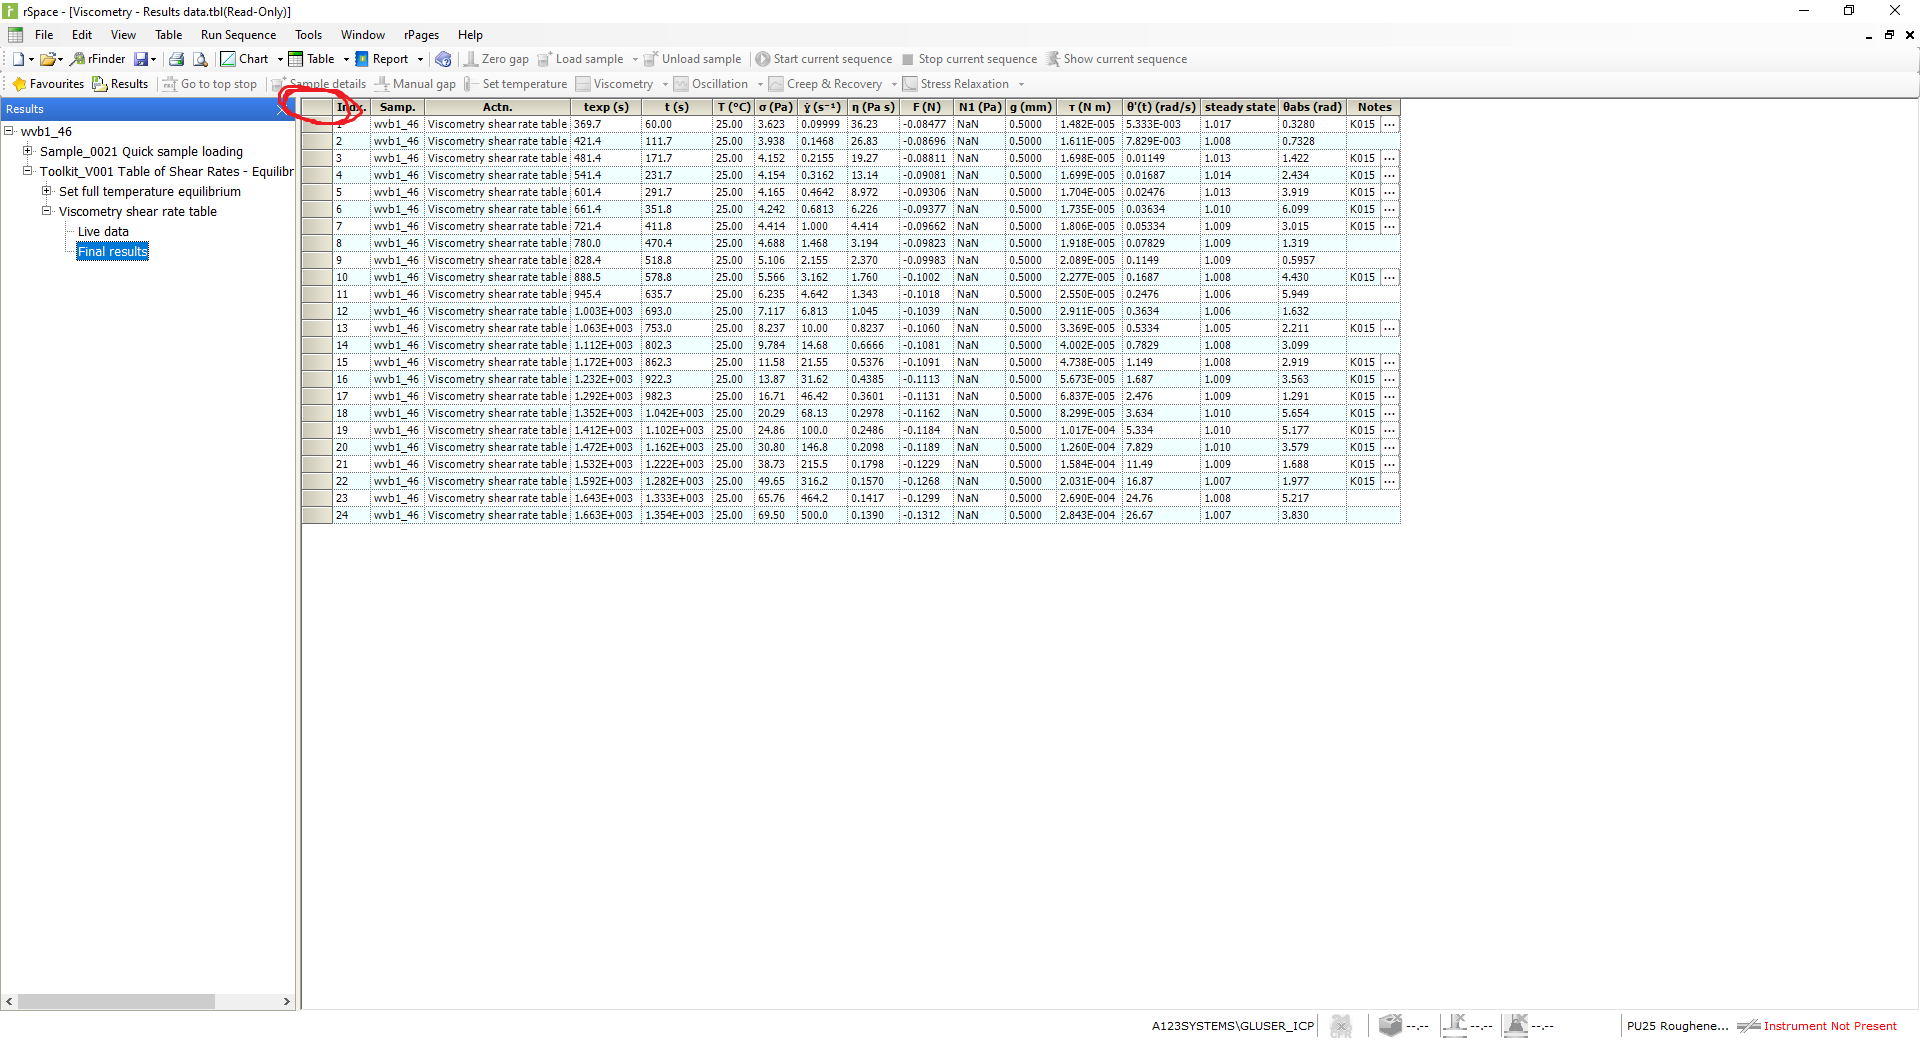

Step 4, go to Table and click Export Data where you can now save the data with whatever name you want
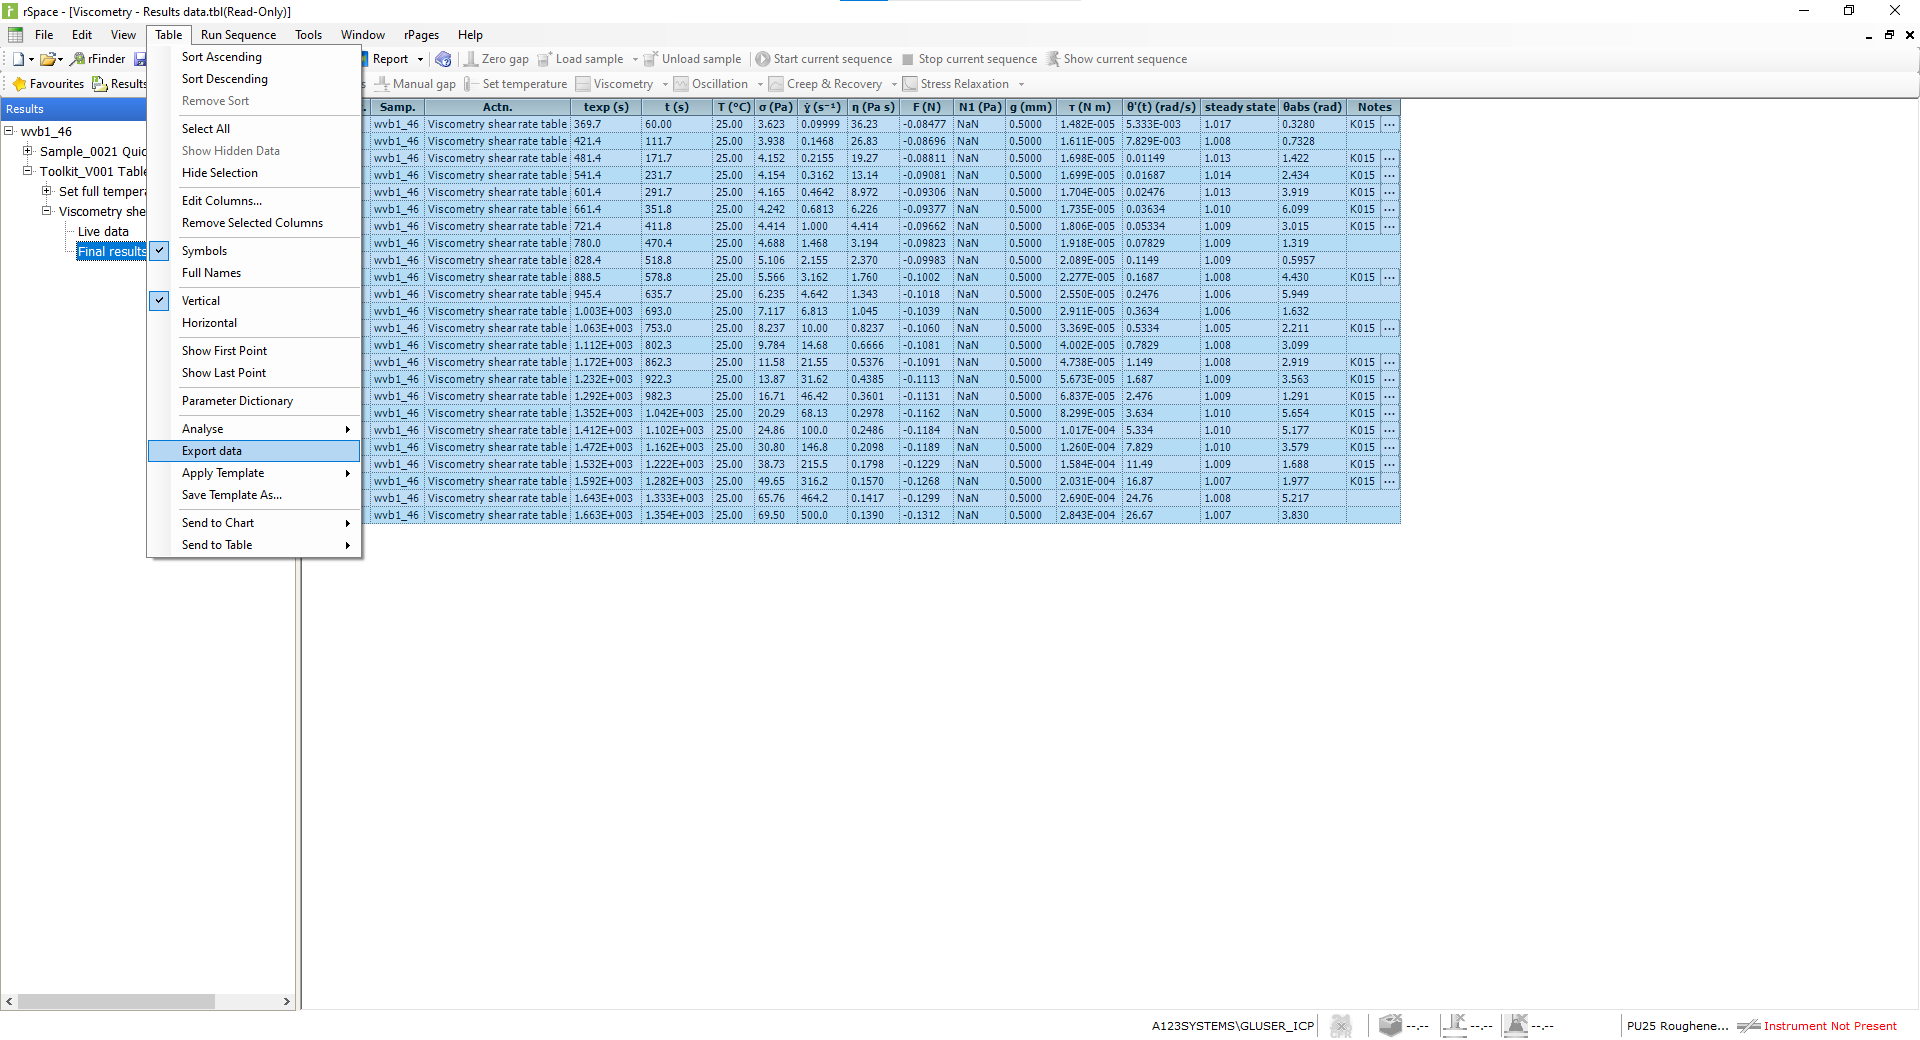

## How should the format be for the files?
The file should be a .csv file with the headers and the data
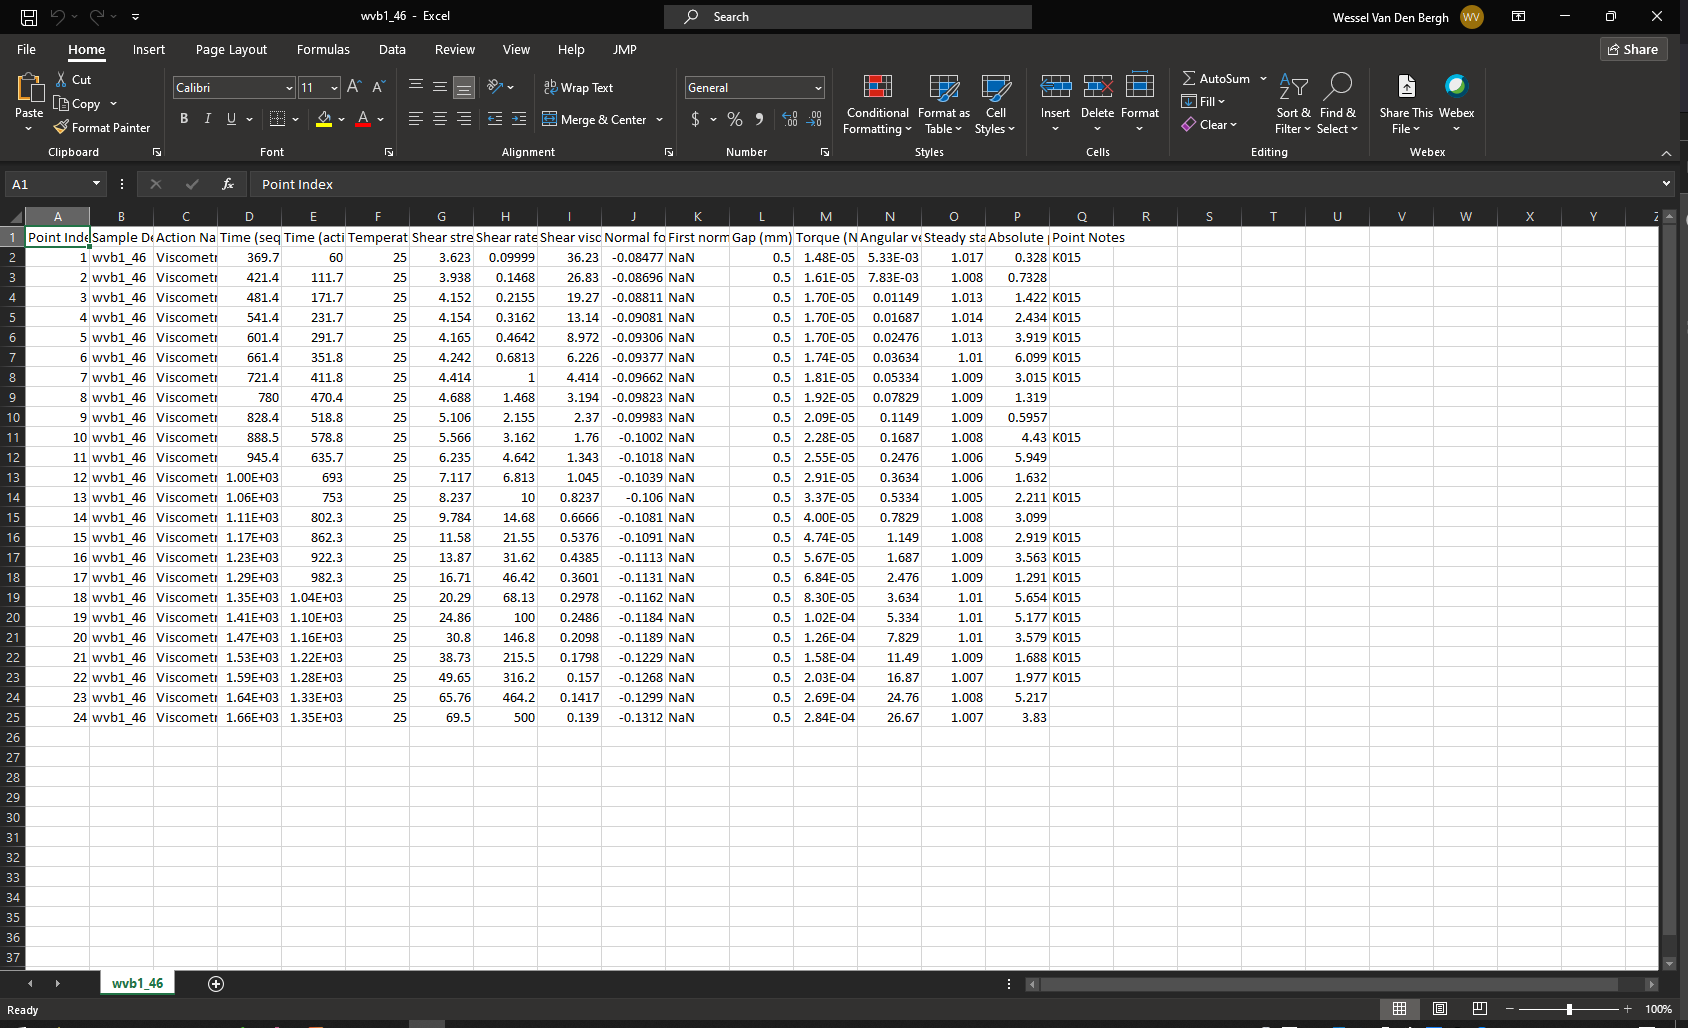

## How do I use this script? I don't know any coding...

No problem, if you can hit Shift+Enter and type into prompts then you are fine.

### Step 1

You should see a blue bar to the left of this text, this refers to which part of the code the system will read next. To have the system read the code, just hit Shift+Enter and it will go to the next "Cell"

### Step 2

Each cell will have a Blurb at the top with a # before it, this is meant to tell you what the cell is doing. There are some cells that you don't need to worry about changing and others that only need very minor input.

Read the blurb, if it says "#Don't worry about it", then just hit Shift+Enter

You can tell if the cell is done running by either an output such as a number or plot OR it will read "DONE"


In [ ]:
#Don't worry about it, just hit Shift+Enter

#Author: Wess van den Bergh
#Date Modified: Sep 16, 2024
#Environment: v2_Pharmakinetics
#Verified By: 

#NOTES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri as cmc
import warnings
import os
from tkinter import*


def import_unique_data():
    """ grabs data from folders with GUI and then has user provide a custom name for plotting """
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    
    from tkinter import filedialog
    infiles = filedialog.askopenfilename(multiple=True)
    
    %gui tk

    custom_labels = pd.DataFrame(columns = ['filepath', 'label'])
    custom_labels = pd.concat([custom_labels, pd.DataFrame([{} for _ in range(len(infiles))])], ignore_index=True)
    
    for i,path in enumerate(infiles): 
        custom_labels.loc[i, 'filepath'] = path
        filename = os.path.basename(path)
        custom_labels.loc[i, 'label'] = str(input("Enter a label for {}: ".format(filename)))
        
    return custom_labels

    
def plot_rheo_data_shear_rate(custom_labels,
                  line_width = 4,
                  ax_font_size = 14,
                  legend_font_size = 10,
                  legend_pos = "upper right"
                 ):
    """" 
    takes data from import data function and a few plotting parameters and
    plots the rheology shear rate table data for clean visualization 
    """
    
    fig = plt.figure(figsize=(8, 6))
    
    for i in range(len(custom_labels)):
        temp_data = pd.read_csv(custom_labels['filepath'][i], header = 0)
        plt.plot(temp_data["Shear rate (s⁻¹)"], temp_data["Shear viscosity (Pa s)"], linewidth = line_width, c = cmc.cm.batlow((i/len(custom_labels)*0.8)))
        del temp_data
        
            # Add labels and title
    plt.xlabel('Shear rate (s⁻¹)',  fontsize = ax_font_size, fontweight = 'bold')
    plt.ylabel('Shear viscosity (Pa s)',  fontsize = ax_font_size, fontweight = 'bold')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=ax_font_size, fontweight='bold')
    plt.yticks(fontsize=ax_font_size, fontweight='bold')
    
    plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks

    plt.box(True)
    plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
    plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
    plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
    plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness

    legend = plt.legend(custom_labels['label'], framealpha=1, frameon=True, fontsize=legend_font_size, loc=legend_pos)
    frame = legend.get_frame()
    frame.set_edgecolor('black')  # Set legend box color
    frame.set_linewidth(2)        # Set legend box thickness
    for text in legend.get_texts():
        text.set_fontweight('bold')

    plt.grid(True, which = 'major', axis = 'x', linestyle = '--')
    
print("DONE")

In [ ]:
#Don't worry about it, just hit Shift+Enter, the entries below in plot_rheo_data_shear_rate are for plotting
rheo_data = import_unique_data()
plot_rheo_data_shear_rate(rheo_data,
                          line_width = 4,
                          ax_font_size = 14,
                          legend_font_size = 10,
                          legend_pos = "upper right"
                         )

## How do I save my plot?

Shift+Right Click the plot and save the image!

## I want to change something!

No problem, just click the circular arrow/restart kernel and it will ask you if you do want to restart the kernel? Click restart kernel

This isn't necessary if you are familiar with coding but if you want a clean slate, just go ahead and do it and start from the beginning